<a href="https://colab.research.google.com/github/Samgomes2510/estatistica_basica_projeto3/blob/main/projeto3_estatistica_basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pandas
!pip install matplotlib
!pip install plotly

In [21]:
!pip install seaborn

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [9]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=';')

df.head(10)

,"title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria"
0,"Pack 12 un, Leche extra proteína 1 L,Loncolech..."
1,"Pack 12 un, Leche chocolate receta original 1 ..."
2,"Pack 12 un, Leche semidescremada chocolate 1 L..."
3,"Pack 12 un, Leche semidescremada frutilla 1 L,..."
4,"Pack 12 un, Leche sin lactosa chocolate 1 L,Lo..."
5,"Pack 12 un, Leche sin lactosa frutilla 1 L,Lon..."
6,"Pack 12 un, Leche saborizada light chocolate 1..."
7,"Pack 12 un, Leche saborizada frutilla 1 L,Colu..."
8,"Pack 12 un, Leche saborizada vainilla 1 L,Colu..."
9,"Pack 12 un, Leche saborizada manjar 1 L,Colun,..."


In [12]:
# Média por Categoria
# pd.read_csv will attempt to detect the delimiter if not specified
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

media = df.groupby('Categoria')['Preco_Normal'].mean().sort_values(ascending=False)

In [14]:
# Mediana por categoria
mediana = df.groupby('Categoria')['Preco_Normal'].median().sort_values(ascending=False)

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


In [15]:
# Unindos os dois em um DataFrame
estatisticas = pd.concat([media, mediana], axis=1)
estatisticas.columns = ['Media', 'Mediana']

estatisticas.head(10)

,Media,Mediana
Categoria,,
comidas-preparadas,3095.043478,3290.0
lacteos,2385.219239,989.0
congelados,2108.042553,1519.0
belleza-y-cuidado-personal,1783.556485,1569.0
frutas,1724.473684,1195.0
verduras,1343.296875,1180.0
instantaneos-y-sopas,765.491228,439.0


In [16]:
# Desvio Padrão
desvio = df.groupby('Categoria')['Preco_Normal'].std().sort_values(ascending=False)
desvio_df = desvio.reset_index()
desvio_df.columns = ['Categoria', 'Desvio Padrao']
desvio_df.head(10)

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


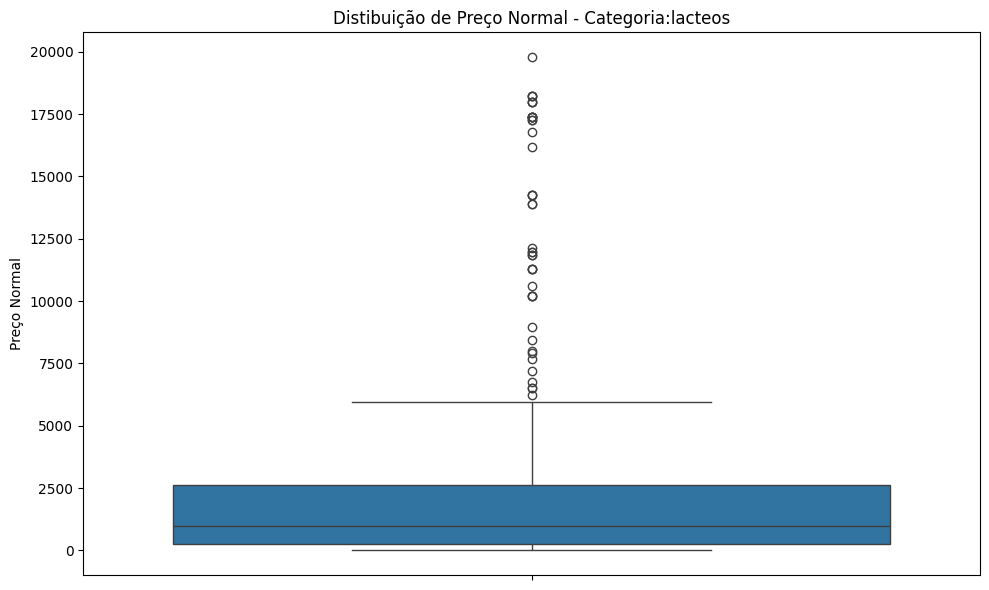

In [22]:
categoria_maior_dp = desvio_df.iloc[0]['Categoria']

# Filtrar os dados
dados_categoria = df[df['Categoria'] == categoria_maior_dp]

# Boxplot com Seaborn
plt.figure(figsize=(10,6))
sns.boxplot(y='Preco_Normal', data=dados_categoria)
plt.title(f'Distibuição de Preço Normal - Categoria:{categoria_maior_dp}')
plt.ylabel('Preço Normal')
plt.tight_layout()
plt.show()

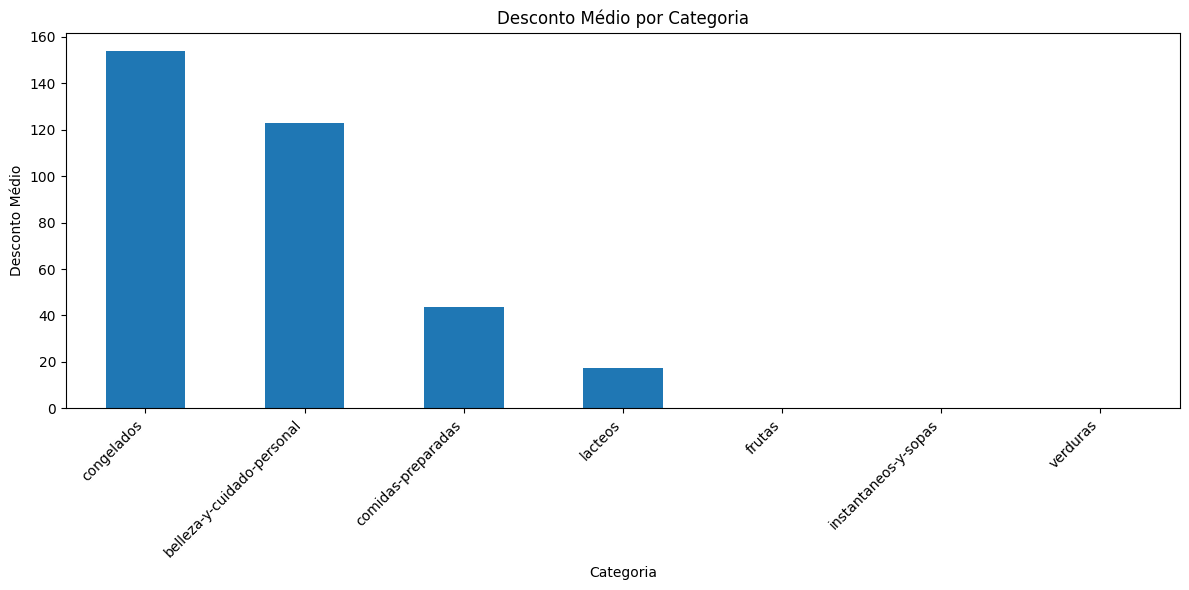

In [24]:
# Agrupamento e Média
desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
desconto_por_categoria.plot(kind='bar')
plt.title('Desconto Médio por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Desconto Médio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
# Agrupamento
mapa_df = df.groupby(['Categoria', 'Marca']) ['Desconto'].mean().reset_index()

# Treemap com Plotly
fig = px.treemap(mapa_df, path=['Categoria', 'Marca'], values='Desconto',
                 title='Desconto Médio por Categoria e Marca')
fig.show()